> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]
**Made By:** Ayush Pandey  
**Date:** 17 February 2026

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction

In this project, I investigate the TMDb movie dataset to understand which factors are associated with higher movie revenue. The dataset contains information about movies such as budget, revenue, genres, ratings, popularity, and release year.

The goal of this analysis is to explore relationships between multiple variables using NumPy and pandas, and to communicate findings through visualizations and descriptive analysis.


### Dataset Description

The TMDb movie dataset contains information about 10,866 movies collected from The Movie Database (TMDb). Each row represents a single movie along with various attributes related to its financial performance and audience reception.

Important columns in the dataset include:

- `id`: Unique identifier for each movie  
- `original_title`: Title of the movie  
- `budget`: Budget of the movie in USD  
- `revenue`: Revenue generated by the movie in USD  
- `budget_adj`: Budget adjusted for inflation (2010 USD)  
- `revenue_adj`: Revenue adjusted for inflation (2010 USD)  
- `genres`: Genres associated with the movie (pipe-separated)  
- `release_year`: Year the movie was released  
- `vote_average`: Average user rating  
- `vote_count`: Number of votes received  
- `popularity`: Popularity score from TMDb  

The adjusted budget and revenue columns are used in this analysis to allow fair comparison across different release years.



### Questions for Analysis

This analysis focuses on understanding what factors influence movie revenue.

The primary dependent variable used in this investigation is:
- `revenue_adj`

The independent variables explored include:
- `budget_adj`
- `genres`
- `release_year`
- `vote_average`

Based on these variables, the following research questions are addressed:

1. How does a movie’s budget relate to its revenue?
2. Which genres generate the highest average revenue?
3. How has average movie revenue changed over time?
4. Do movies with higher audience ratings tend to earn more revenue?


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [4]:
!ls


Database_Ncis_and_Census_data  Database_TMDb_movie_data
Database_No_show_appointments  Investigate_a_Dataset.ipynb


<a id='wrangling'></a>
## Data Wrangling
In this section, the dataset is loaded and inspected to understand its structure, data types, and overall quality. The data is examined for missing values, incorrect data types, and potentially invalid entries that may affect the analysis.

### General Properties

After loading the dataset, several inspection methods were used to understand the structure of the data, including viewing sample rows, checking data types, and summarizing statistics.

The dataset contains multiple columns related to movie finances, ratings, and metadata. Some columns contain missing values, and several financial columns include zero values, which are not meaningful for analysis.


In [5]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.shape


(10866, 21)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# Remove rows with zero budget or revenue
df_clean = df[(df['budget_adj'] > 0) & (df['revenue_adj'] > 0)]

# Drop missing values
df_clean = df_clean.dropna(subset=['genres', 'vote_average'])

# Select relevant columns
df_clean = df_clean[['release_year', 'budget_adj', 'revenue_adj',
                     'genres', 'vote_average', 'popularity']]


In [13]:
df_clean.shape


(3855, 6)

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the dataset, exploratory data analysis was conducted to answer the research questions. Descriptive statistics and visualizations were used to identify trends and relationships between movie revenue and other variables.


### Research Question 1: How does budget relate to revenue?

This analysis explores the relationship between a movie’s adjusted budget and its adjusted revenue. A scatter plot is used to visualize whether higher budgets are generally associated with higher revenue.


### Helper Functions

To avoid repeating the same labeling and plotting code across multiple visualizations, the following helper functions are defined. These functions improve code readability and follow good coding practices by reusing common plotting logic.


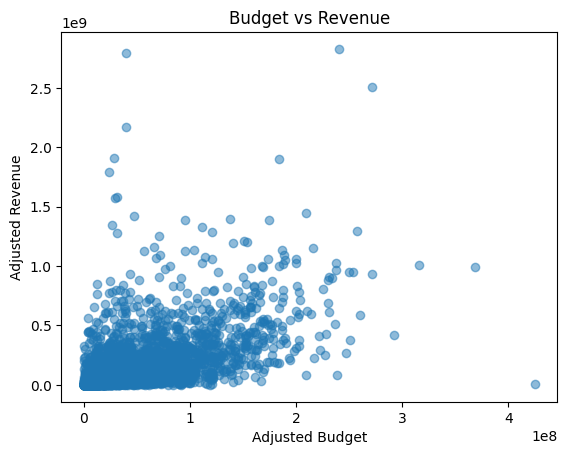

In [26]:
plt.scatter(df_clean['budget_adj'], df_clean['revenue_adj'], alpha=0.5)
plot_labels('Adjusted Budget', 'Adjusted Revenue', 'Budget vs Revenue')
plt.show()



### Research Question 2: Which genres generate the highest average revenue?

Since movies can belong to multiple genres, the genre column is separated to analyze each genre individually. The average adjusted revenue is calculated for each genre to identify which genres tend to generate higher earnings.


In [15]:
# Split genres into separate rows
genres_df = df_clean.assign(genres=df_clean['genres'].str.split('|')).explode('genres')

genre_revenue = genres_df.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False)

genre_revenue.head(10)


genres
Animation          2.909574e+08
Adventure          2.714075e+08
Fantasy            2.499928e+08
Family             2.437910e+08
Science Fiction    2.017662e+08
Action             1.952089e+08
War                1.558981e+08
Western            1.356748e+08
Music              1.345660e+08
Thriller           1.280653e+08
Name: revenue_adj, dtype: float64

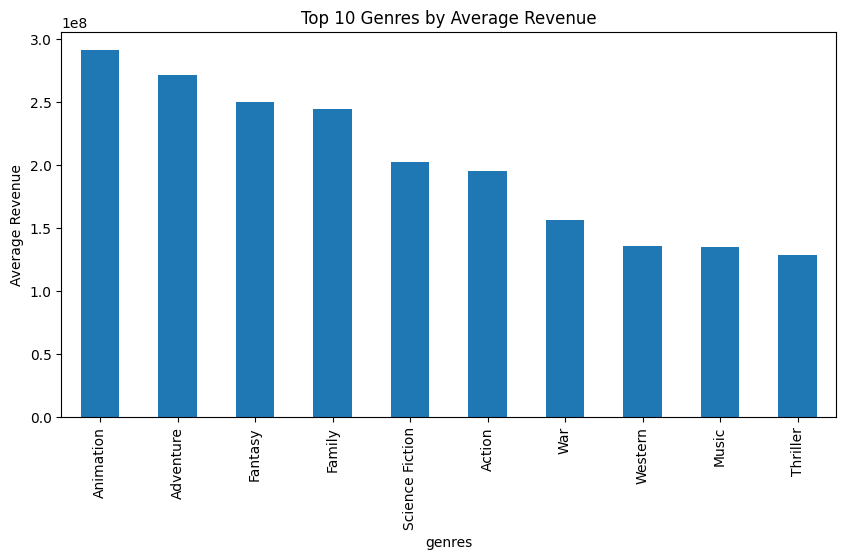

In [16]:
genre_revenue.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Genres by Average Revenue')
plt.ylabel('Average Revenue')
plt.show()


### Research Question 3: How has movie revenue changed over time?

To examine trends over time, the average adjusted revenue is calculated for each release year. A line plot is used to visualize how movie revenue has evolved across different years.


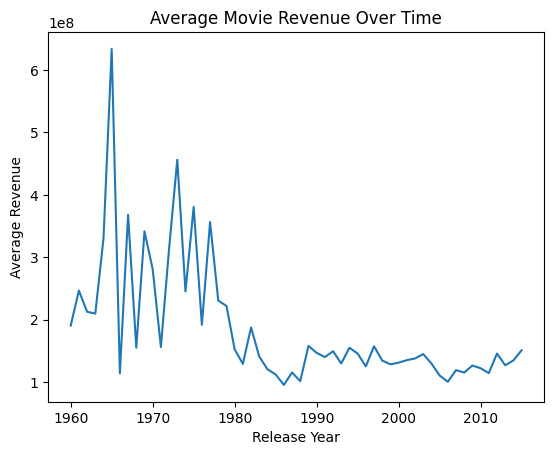

In [29]:
yearly_revenue = df_clean.groupby('release_year')['revenue_adj'].mean()

plot_line(
    yearly_revenue,
    'Release Year',
    'Average Revenue',
    'Average Movie Revenue Over Time'
)
plt.show()



### Research Question 4: Do higher-rated movies earn more revenue?

This section explores the relationship between audience ratings and movie revenue. Average revenue is analyzed across different rating values to observe whether higher-rated movies tend to perform better financially.


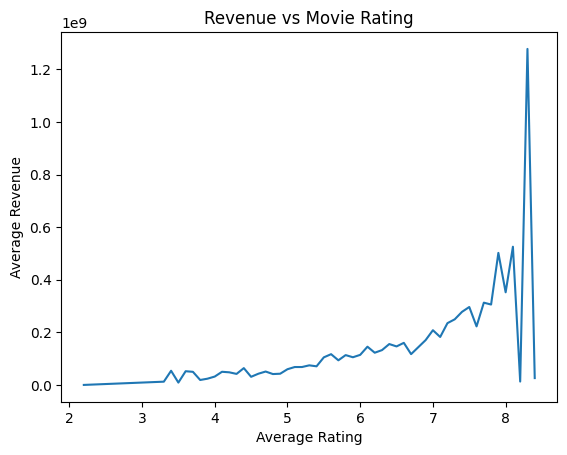

In [18]:
df_clean.groupby('vote_average')['revenue_adj'].mean().plot()
plt.xlabel('Average Rating')
plt.ylabel('Average Revenue')
plt.title('Revenue vs Movie Rating')
plt.show()


<a id='conclusions'></a>
## Conclusions

This investigation analyzed the TMDb movie dataset to understand factors associated with higher movie revenue.

Key findings from the analysis include:
- Movies with higher budgets generally tend to generate higher revenue.
- Certain genres, such as Adventure and Science Fiction, have higher average revenue compared to others.
- Average movie revenue has increased over time, particularly in more recent years.
- Movies with higher audience ratings tend to earn more revenue, although rating alone does not guarantee financial success.


In [19]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 302801 bytes to Investigate_a_Dataset.html
